In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import itertools

In [2]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount_retraite.csv', index_col=0)
df_test = pd.read_csv('datasets/SatisfactionClients/amazon_test1.csv', index_col=0)
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
110865,FR,5,parfait,"2 déc. 2018Vérifiéparfaitparfait, des prix super compétitifs sur les playmobil! merciDate de l'expérience: 02 décembre 2018","['déc', 'vérifiéparfaitparfait', 'prix', 'super', 'compétitifs', 'playmobil', 'mercidate', 'expérience', 'décembre']",['parfait']
75832,FR,5,Site sérieux,25 mars 2020VérifiéSite sérieuxDate de l'expérience: 25 mars 2020,"['mars', 'vérifiésite', 'sérieuxdate', 'expérience', 'mars']","['site', 'sérieux']"
96100,FR,4,a voir a la livraison merci,6 avr. 2019Vérifiéa voir a la livraison merciDate de l'expérience: 06 avril 2019,"['avr', 'vérifiéa', 'voir', 'livraison', 'mercidate', 'expérience', 'avril']","['voir', 'livraison', 'merci']"


In [4]:
# séparation de la variable cible et des variables explicatives
X = df['Commentaire_filtre']
y = df['note']

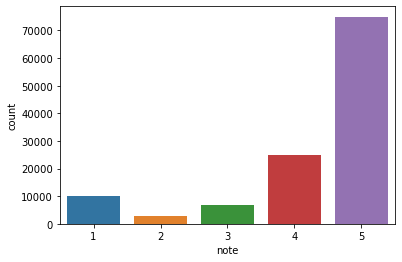

In [5]:
import seaborn as sns
sns.countplot(x='note', data=df);

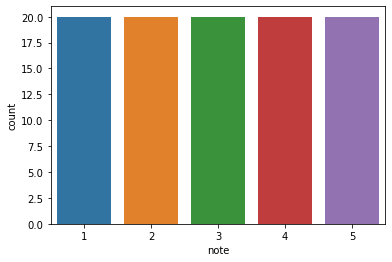

In [6]:
sns.countplot(x='note', data=df_test);

In [8]:
# séparation du jeu de données en un dataset d'entrainement et un dataset de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
# conversion des chaines de caratères en tokens numériques
# on ne prendra que les éléments répétés au moins 3 fois avec min_df=3
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=14000, ngram_range=[1, 2])
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [10]:
print(X_train.shape)
print(X_test.shape)
print(df_test.shape)

(96000, 14000)
(24000, 14000)
(100, 4)


In [17]:
vectorizer.get_feature_names()

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandonne',
 'abandonné',
 'aberrant',
 'abimer',
 'abimé',
 'abimés',
 'abonne',
 'abonnement',
 'abonnement annuel',
 'abonnement cdiscount',
 'abonnement date',
 'abonnement discount',
 'abonnement euros',
 'abonnement livraison',
 'abonnement volonté',
 'abonnements',
 'abonner',
 'abonné',
 'abonné cdiscount',
 'abonnée',
 'abonnés',
 'abord',
 'abordable',
 'abordable date',
 'abordable livraison',
 'abordabledate',
 'abordabledate expérience',
 'abordables',
 'abordablesdate',
 'abordablesdate expérience',
 'abouti',
 'abri',
 'absence',
 'absent',
 'absents',
 'absolument',
 'absolument date',
 'absolument rien',
 'abus',
 'abuser',
 'abusif',
 'abusive',
 'abusé',
 'acceder',
 'accent',
 'acceptable',
 'acceptation',
 'accepte',
 'accepter',
 'acceptez',
 'accepté',
 'acceptée',
 'acces',
 'accessible',
 'accessible ici',
 'accessibles',
 'accessoire',
 'accessoires',
 'acceuil',
 'accident',
 'accord',
 'accorde',
 'accordé',
 'accueil',
 'accueil téléphonique',
 'accusé',


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [19]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(clf.score(X_test, y_test), end='\n\n')

cr = classification_report(y_test, y_pred)
print(cr)

cm = pd.crosstab(y_test, y_pred, rownames=['données réelles'], colnames=['predictions'])
display(cm)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = clf.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.691875

              precision    recall  f1-score   support

           1       0.70      0.74      0.72      2098
           2       0.13      0.01      0.02       552
           3       0.33      0.13      0.19      1313
           4       0.41      0.21      0.28      5027
           5       0.74      0.92      0.82     15010

    accuracy                           0.69     24000
   macro avg       0.46      0.40      0.41     24000
weighted avg       0.63      0.69      0.65     24000



predictions,1,2,3,4,5
données réelles,,,,,
1,1559,6,82,75,376
2,222,7,65,83,175
3,193,17,172,324,607
4,163,11,124,1041,3688
5,86,13,79,1006,13826


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


predictions,1,4,5
données réelles,,,
1,20,0,0
2,14,2,4
3,11,6,3
4,12,0,8
5,5,1,14


predictions,1,4,5
données réelles,,,
1,1.00,0.00,0.00
2,0.70,0.10,0.20
3,0.55,0.30,0.15
4,0.60,0.00,0.40
5,0.25,0.05,0.70


les prédictions correctes sont supérieures à 50% pour 1 étoile(s) avec 100.0 %
les prédictions correctes sont supérieures à 50% pour 5 étoile(s) avec 70.0 %


In [20]:
from joblib import dump
dump(clf, 'datasets/SatisfactionClients/model_rf_tfidf_ngrams_1_2.jolib')

['datasets/SatisfactionClients/model_rf_tfidf_ngrams_1_2.jolib']